## Test Whether Algorithmic Advances Are Orthogonal 

Look at rotary sgd transformer 
look at computational advantage of lstm sgd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

lstm_16d_adam = pd.read_csv("../experimental_data_folder/LSTM_Optimizer_Experiments/LSTM_adam.csv")

lstm_16d_sgd = pd.read_csv("../experimental_data_folder/LSTM_Optimizer_Experiments/LSTM_SGD_Benchmark.csv")

transformer_32d_sgd_no_rotary = pd.read_csv("../experimental_data_folder/Two_Changes_Experiments/32d_new_hyper_params.csv")

transformer_32d = pd.read_csv("../experimental_data_folder/Hidden_Dim_Scaling/32d_123.csv")

#xtract flops and validation loss 
lstm_16d_adam_flops = lstm_16d_adam['total_flops_profiler'].iloc[-1]
lstm_16d_adam_val_loss = lstm_16d_adam['validation_loss'].iloc[-1]
lstm_16d_sgd_flops = lstm_16d_sgd['total_flops_profiler'].iloc[-1]
lstm_16d_sgd_val_loss = lstm_16d_sgd['validation_loss'].iloc[-1]

transformer_32d_sgd_no_rotary_flops = transformer_32d_sgd_no_rotary['total_flops_profiler'].iloc[-1]
transformer_32d_sgd_no_rotary_val_loss = transformer_32d_sgd_no_rotary['validation_loss'].iloc[-1]
transformer_32d_flops = transformer_32d['total_flops_profiler'].iloc[-1]
transformer_32d_val_loss = transformer_32d['validation_loss'].iloc[-1]
—


14.936377977578116 0.06695063565619185
216.30527884592772


In [ ]:

def final_loss(file_name):
    file = pd.read_csv(file_name)
    return file['validation_loss'].iloc[-1]



def compute_effect(loss_1, loss_2):
    irreducible = 1.7
    return np.exp(-(np.log(loss_1-irreducible)-np.log(loss_2-irreducible))/.155)

compute_effect_16d_adam_sgd = compute_effect(lstm_16d_adam_val_loss, lstm_16d_sgd_val_loss)
compute_effect_16d_sgd_adam = compute_effect(lstm_16d_sgd_val_loss, lstm_16d_adam_val_loss)

print(compute_effect_16d_adam_sgd, compute_effect_16d_sgd_adam)

#determine the compute effects of sgd and sinusoidal encodings alone. 
compute_effect_sinusoidal = 


# determine the compute effects of sgd and sinusoida encodings
compute_effect_32d_adam_sgd_no_rotary = compute_effect(transformer_32d_val_loss, transformer_32d_sgd_no_rotary_val_loss)





print(compute_effect_32d_adam_sgd_no_rotary)





In [12]:
#compute effect of sgd vs adam on transformer
transformer_32d_sgd = pd.read_csv("../experimental_data_folder/Hidden_Dim_Scaling_SGD/32d_123_sgd.csv")
transformer_32d_adam = pd.read_csv("../experimental_data_folder/Hidden_Dim_Scaling/32d_123.csv")

compute_effect_sgd_adam = compute_effect(transformer_32d_sgd['validation_loss'].iloc[-1], transformer_32d_adam['validation_loss'].iloc[-1])
print(compute_effect_sgd_adam)

compute_effect_adam_sgd = compute_effect(5.9864, transformer_32d_sgd['validation_loss'].iloc[-1])
print(compute_effect_adam_sgd)

0.012145294092247573
41.614922222401965


In [ ]:
#bar plot the discreprency between the full components and the multiplied components

multiplied_expectation_rotary = compute_effect_32d_sgd_no_rotary_adam * 







In [18]:

def final_loss(file_name):
    file = pd.read_csv(file_name)
    return file['validation_loss'].iloc[-1]



def compute_effect(smaller_loss_1, larger_loss_2):
    irreducible = 1.7
    return np.exp(-(np.log(smaller_loss_1-irreducible)-np.log(larger_loss_2-irreducible))/.155)



#compute effect rotary 
standard_transformer = final_loss("../experimental_data_folder/Hidden_Dim_Scaling/32d_123.csv")

loss_sinusoidal = final_loss("../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary/32d_no_rotary.csv")
effect_rotary = compute_effect(standard_transformer, loss_sinusoidal)
print(effect_rotary)

#compute effect sgd 
loss_sgd = final_loss("../experimental_data_folder/Hidden_Dim_Scaling_SGD/32d_123_sgd.csv")
effect_sgd = compute_effect(standard_transformer, loss_sgd)
print(effect_sgd)

#compute effect sgd no rotary combined 
loss_sgd_no_rotary = final_loss("../experimental_data_folder/Two_Changes_Experiments/32d_new_hyper_params.csv")
effect_sgd_no_rotary = compute_effect(standard_transformer, loss_sgd_no_rotary)
print(effect_sgd_no_rotary)




# sgd_no_rotary = final_loss("experimental_data_folder/Two_Changes_Experiments/32d_new_hyper_params.csv")







3.690710495352007
82.33641708505907
216.30527884592772


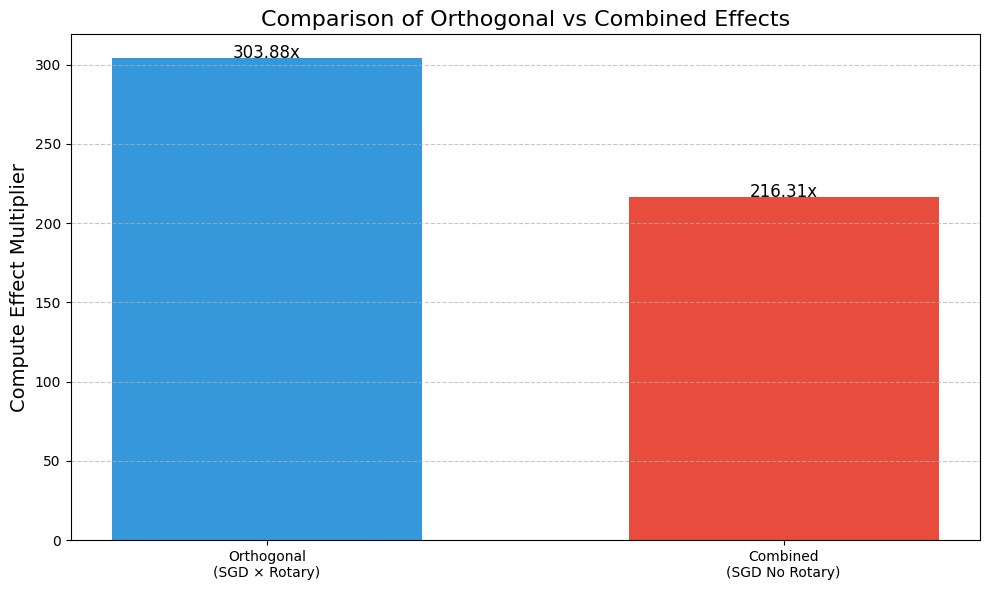

In [20]:
#bar plot 
combined_effect_orthog = effect_sgd*effect_rotary
combined_effect_sgd_no_rotary = effect_sgd_no_rotary

# Create bar plot comparing the two effects
labels = ['Orthogonal\n(SGD × Rotary)', 'Combined\n(SGD No Rotary)']
values = [combined_effect_orthog, combined_effect_sgd_no_rotary]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#3498db', '#e74c3c'], width=0.6)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}x', ha='center', fontsize=12)

plt.ylabel('Compute Effect Multiplier', fontsize=14)
plt.title('Comparison of Orthogonal vs Combined Effects', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
